<a href="https://colab.research.google.com/github/vkatari90/Practical-Data-Analytics-Solutions/blob/week1/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('stroke.csv')

In [3]:
print(df.head())
print(df.dtypes)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
id                     int64
gender                objec

In [4]:
df.shape

(5110, 12)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

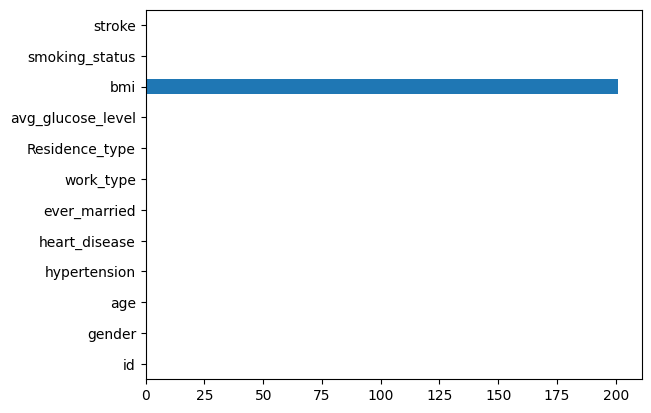

In [5]:
print(df.isna().sum())
df.isna().sum().plot.barh()

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df = df.drop(['id'],axis=1)

In [9]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

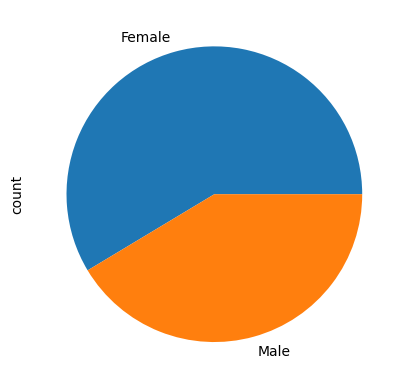

In [10]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")

<Axes: xlabel='gender'>

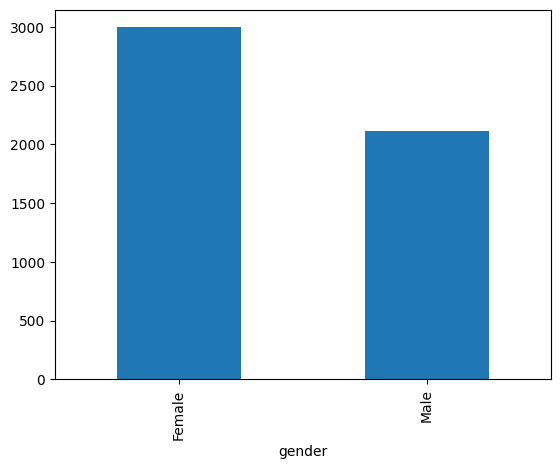

In [11]:
df['gender'].value_counts().plot(kind="bar")

<Axes: xlabel='stroke'>

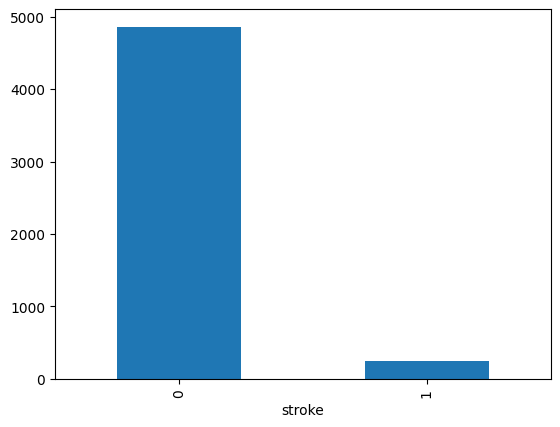

In [12]:
df['stroke'].value_counts().plot(kind="bar")

In [13]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


<Axes: ylabel='count'>

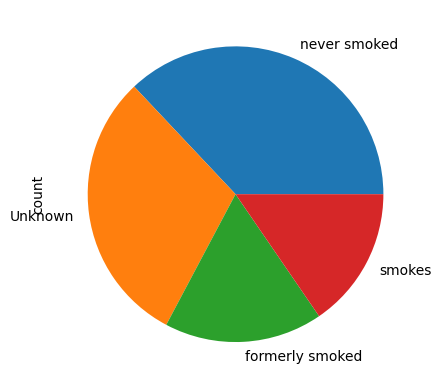

In [14]:
df['smoking_status'].value_counts().plot(kind="pie")

<Axes: xlabel='smoking_status'>

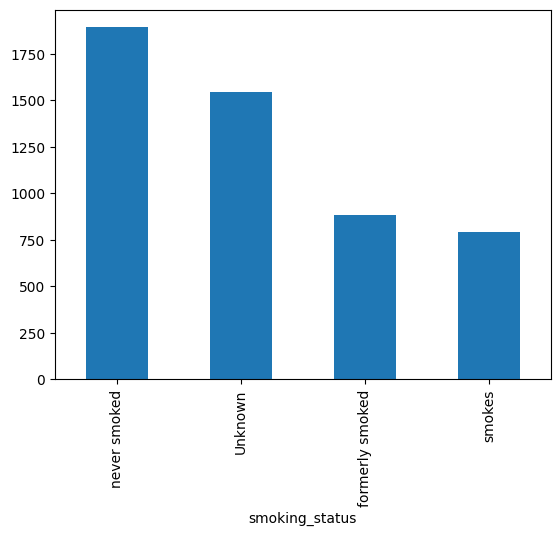

In [15]:
df['smoking_status'].value_counts().plot(kind="bar")

In [16]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

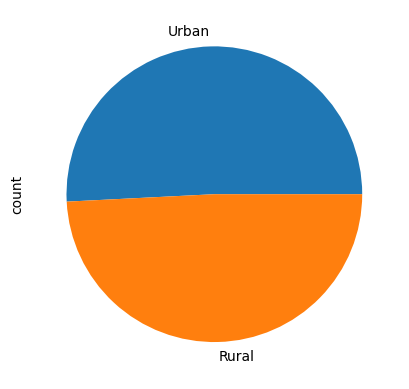

In [17]:
df['Residence_type'].value_counts().plot(kind="pie")

<Axes: xlabel='Residence_type'>

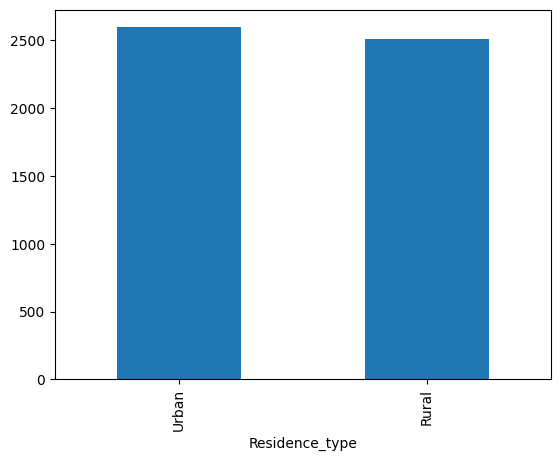

In [18]:
df['Residence_type'].value_counts().plot(kind="bar")

In [19]:
df['bmi'].nunique()

418

In [20]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
list_col=['smoking_status','work_type','Residence_type','gender']


for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SMOKING_STATUS :['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 
WORK_TYPE :['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 
RESIDENCE_TYPE :['Urban' 'Rural'] 
GENDER :['Male' 'Female'] 


In [22]:
df['age'].isnull().sum()

0

In [23]:
if 'id' in df.columns:
    X = df.drop(columns=['id', 'stroke'])
else:
    X = df.drop(columns=['stroke'])

In [24]:
y = df['stroke']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [27]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [28]:

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [29]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [30]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [31]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

In [32]:
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

In [33]:
log_reg.fit(X_train_smote, y_train_smote)
rf_clf.fit(X_train_smote, y_train_smote)
gb_clf.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [34]:
log_reg_preds_smote = log_reg.predict(X_test_processed)
rf_clf_preds_smote = rf_clf.predict(X_test_processed)
gb_clf_preds_smote = gb_clf.predict(X_test_processed)

In [35]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [36]:
log_reg_eval_smote = evaluate_model(y_test, log_reg_preds_smote)
rf_clf_eval_smote = evaluate_model(y_test, rf_clf_preds_smote)
gb_clf_eval_smote = evaluate_model(y_test, gb_clf_preds_smote)

In [37]:
print(f"Logistic Regression: Accuracy: {log_reg_eval_smote[0]*100:.2f}% Precision: {log_reg_eval_smote[1]*100:.2f}% Recall: {log_reg_eval_smote[2]*100:.2f}% F1-Score: {log_reg_eval_smote[3]*100:.2f}%")
print(f"Random Forest Classifier: Accuracy: {rf_clf_eval_smote[0]*100:.2f}% Precision: {rf_clf_eval_smote[1]*100:.2f}% Recall: {rf_clf_eval_smote[2]*100:.2f}% F1-Score: {rf_clf_eval_smote[3]*100:.2f}%")
print(f"Gradient Boosting Classifier: Accuracy: {gb_clf_eval_smote[0]*100:.2f}% Precision: {gb_clf_eval_smote[1]*100:.2f}% Recall: {gb_clf_eval_smote[2]*100:.2f}% F1-Score: {gb_clf_eval_smote[3]*100:.2f}%")

Logistic Regression: Accuracy: 74.76% Precision: 17.11% Recall: 82.26% F1-Score: 28.33%
Random Forest Classifier: Accuracy: 92.37% Precision: 21.43% Recall: 9.68% F1-Score: 13.33%
Gradient Boosting Classifier: Accuracy: 86.69% Precision: 18.64% Recall: 35.48% F1-Score: 24.44%


In [38]:
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_test, gb_clf_preds_smote))

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.19      0.35      0.24        62

    accuracy                           0.87      1022
   macro avg       0.57      0.63      0.59      1022
weighted avg       0.91      0.87      0.89      1022



# Explanation

#### The models evaluated include Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier. Below are the final performance metrics for each model:

Logistic Regression:
1. Accuracy: 74.76%
2. Precision: 17.11%
3. Recall: 82.26%
4. F1-Score: 28.33%

Random Forest Classifier:
1. Accuracy: 92.37%
2. Precision: 21.43%
3. Recall: 9.68%
4. F1-Score: 13.33%

Gradient Boosting Classifier:
1. Accuracy: 86.69%
2. Precision: 18.64%
3. Recall: 35.48%
4. F1-Score: 24.44%

# Analysis:

### Logistic Regression:
* Achieved high recall for the minority class (1 - stroke), indicating it effectively identifies most actual stroke cases.
* Low precision and moderate F1-Score suggest a significant number of false positives.

### Random Forest Classifier:
* High accuracy but very low recall and precision for the minority class.
* Struggles to identify stroke cases effectively, likely due to the class imbalance despite SMOTE.

### Gradient Boosting Classifier:
* Balanced performance with moderate recall and precision for the minority class.
* Offers a better trade-off between precision and recall compared to Random Forest.

### The Gradient Boosting Classifier provides the best balance between identifying true stroke cases (recall) and minimizing false positives (precision) among the three models evaluated.